A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 731c5ac602752760c8e48fbffcf8c3b850d9dc2a2aedcf2cc48468fc17b673d1 so we will re-download the data.
11490434/11490434 [==============================] - 3s 0us/step


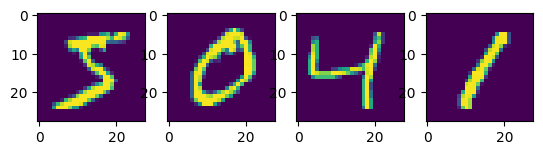

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(141)
plt.imshow(X_train[0])
plt.subplot(142)
plt.imshow(X_train[1])
plt.subplot(143)
plt.imshow(X_train[2])
plt.subplot(144)
plt.imshow(X_train[3])
plt.show()

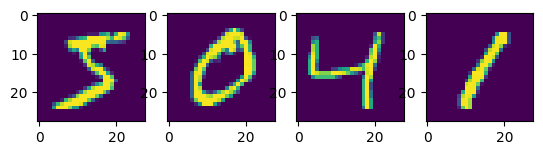

Epoch 1/10
300/300 [==============================] - 16s 49ms/step - loss: 0.2486 - accuracy: 0.9280 - val_loss: 0.0764 - val_accuracy: 0.9774
Epoch 2/10
300/300 [==============================] - 14s 47ms/step - loss: 0.0760 - accuracy: 0.9772 - val_loss: 0.0464 - val_accuracy: 0.9857
Epoch 3/10
300/300 [==============================] - 15s 50ms/step - loss: 0.0527 - accuracy: 0.9846 - val_loss: 0.0420 - val_accuracy: 0.9865
Epoch 4/10
300/300 [==============================] - 15s 49ms/step - loss: 0.0414 - accuracy: 0.9876 - val_loss: 0.0363 - val_accuracy: 0.9877
Epoch 5/10
300/300 [==============================] - 14s 48ms/step - loss: 0.0339 - accuracy: 0.9896 - val_loss: 0.0381 - val_accuracy: 0.9882
Epoch 6/10
300/300 [==============================] - 14s 48ms/step - loss: 0.0274 - accuracy: 0.9913 - val_loss: 0.0309 - val_accuracy: 0.9907
Epoch 7/10
300/300 [==============================] - 14s 47ms/step - loss: 0.0222 - accuracy: 0.9930 - val_loss: 0.0313 - val_accuracy:

In [2]:
# Simple CNN for the MNIST Dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(141)
plt.imshow(X_train[0])
plt.subplot(142)
plt.imshow(X_train[1])
plt.subplot(143)
plt.imshow(X_train[2])
plt.subplot(144)
plt.imshow(X_train[3])
plt.show()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')


# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

# Modify the Python program from Example, change the kernel size of 32 to 64 in the
# Conv2D layer, and compare their performances. Change the filter size (5,5) to (3,3) and
# compare the performances.